In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [150]:
df=pd.read_csv(r'C:\Users\Ankita\Desktop\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [151]:
df.shape

(891, 12)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [109]:
df['Name'].nunique()

891

In [170]:
df['Ticket'].nunique()

681

In [171]:
df['PassengerId']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [152]:
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [153]:
df=df.drop(['Cabin'],axis=1)

In [112]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [113]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [114]:
df.isnull().sum() * 100 / len(df)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

In [69]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [115]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [154]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [117]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [118]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [155]:
df['Sex'].replace('female', 0,inplace=True)
df['Sex'].replace('male', 1,inplace=True)


df['Embarked'].replace('S', 0,inplace=True)
df['Embarked'].replace('C', 1,inplace=True)
df['Embarked'].replace('Q', 2,inplace=True)


In [121]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

In [122]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


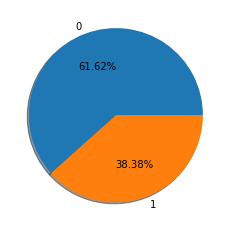

In [122]:
labels='0','1'
fig, ax = plt.subplots()
ax.pie(df['Survived'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

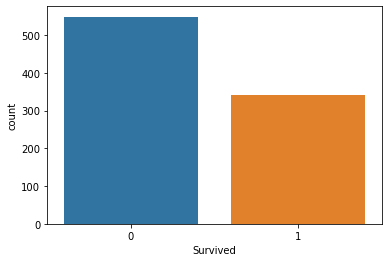

In [20]:
sns.countplot(df['Survived']);

In [102]:
#y.value_counts()

1    549
0    549
Name: Survived, dtype: int64

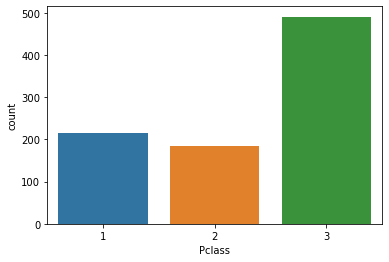

In [24]:
sns.countplot(df['Pclass']);

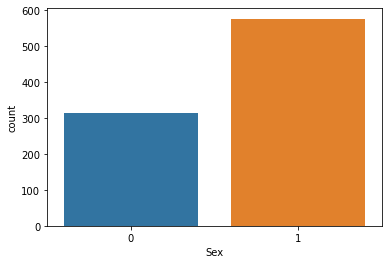

In [25]:
sns.countplot(df['Sex']);

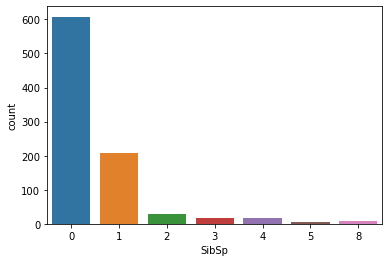

In [27]:
sns.countplot(df['SibSp']);

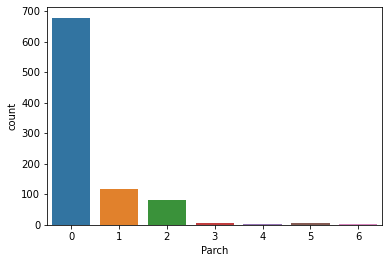

In [28]:
sns.countplot(df['Parch']);

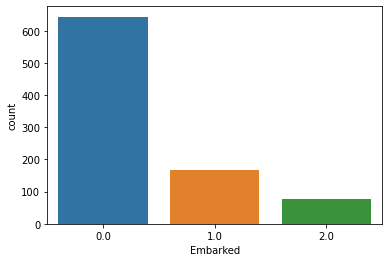

In [29]:
sns.countplot(df['Embarked']);

<AxesSubplot:xlabel='Survived', ylabel='Density'>

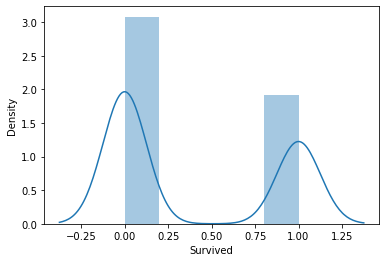

In [42]:
sns.distplot(df["Survived"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

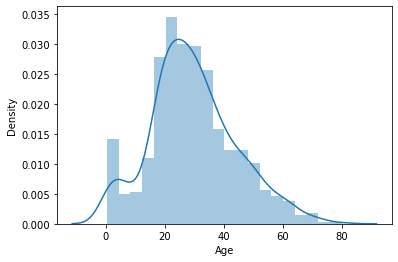

In [49]:
sns.distplot(df["Age"])

<AxesSubplot:xlabel='Sex', ylabel='Density'>

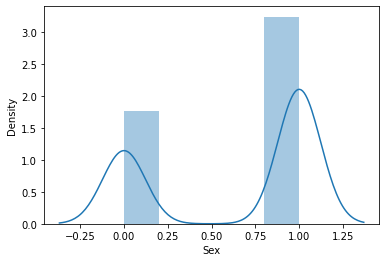

In [48]:
sns.distplot(df["Sex"])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

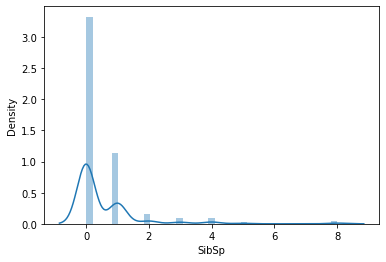

In [51]:
sns.distplot(df["SibSp"])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

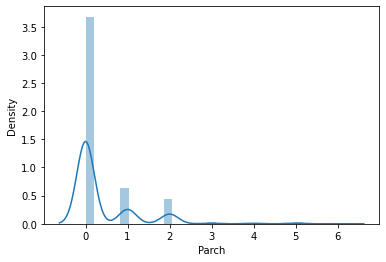

In [52]:
sns.distplot(df["Parch"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

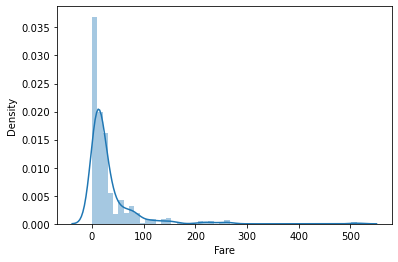

In [53]:
sns.distplot(df["Fare"])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

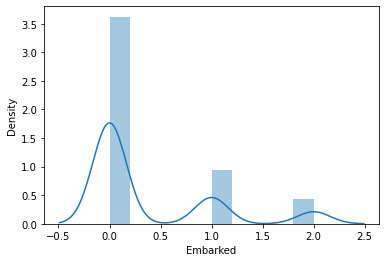

In [54]:
sns.distplot(df["Embarked"])

<AxesSubplot:xlabel='Survived'>

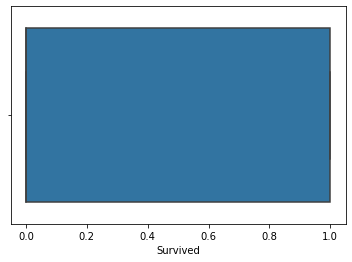

In [55]:
sns.boxplot(df["Survived"])

<AxesSubplot:xlabel='Pclass'>

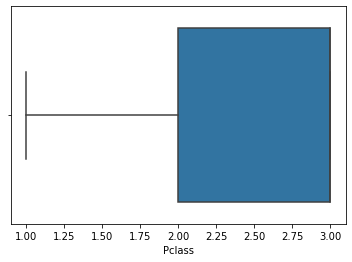

In [56]:
sns.boxplot(df["Pclass"])

<AxesSubplot:xlabel='Sex'>

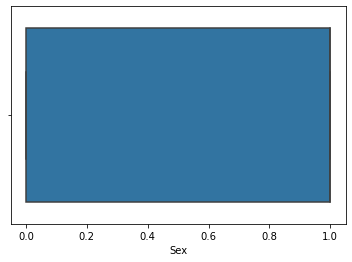

In [57]:
sns.boxplot(df["Sex"])

<AxesSubplot:xlabel='Age'>

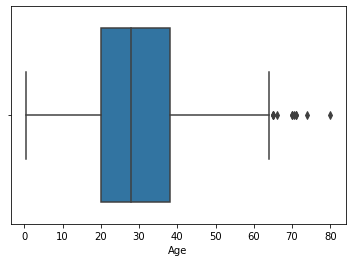

In [58]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='SibSp'>

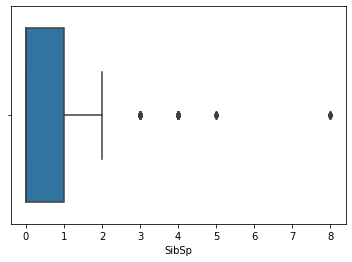

In [59]:
sns.boxplot(df["SibSp"])

<AxesSubplot:xlabel='Parch'>

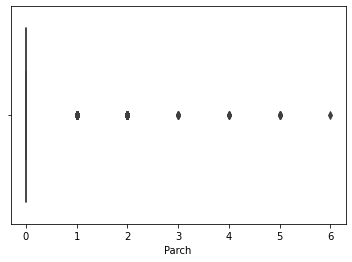

In [60]:
sns.boxplot(df["Parch"])

<AxesSubplot:xlabel='Fare'>

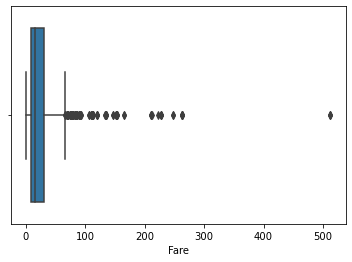

In [61]:
sns.boxplot(df["Fare"])

<AxesSubplot:xlabel='Embarked'>

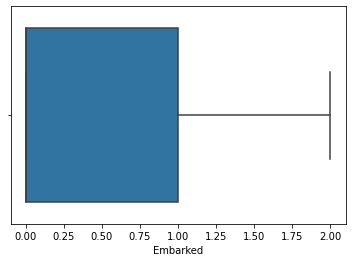

In [62]:
sns.boxplot(df["Embarked"])

Bi-variate Analysis

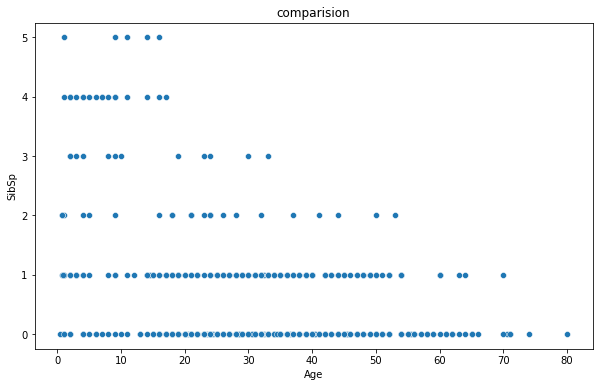

In [68]:
plt.figure(figsize=[10,6])
plt.title('comparision')
sns.scatterplot(df['Age'],df['SibSp']);

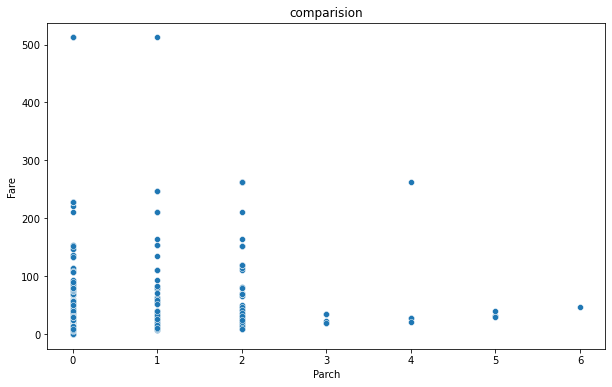

In [69]:
plt.figure(figsize=[10,6])
plt.title('comparision')
sns.scatterplot(df['Parch'],df['Fare']);

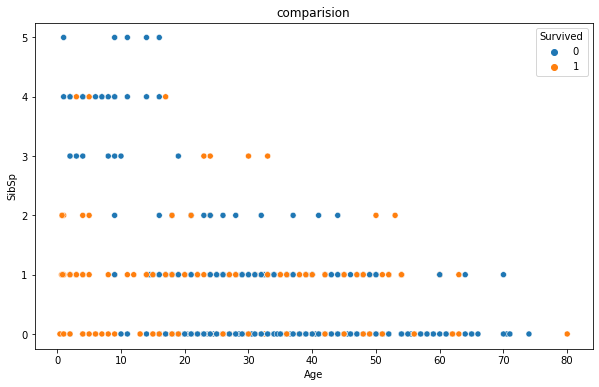

In [70]:
plt.figure(figsize=[10,6])
plt.title('comparision')
sns.scatterplot(df['Age'],df['SibSp'],hue=df["Survived"]);

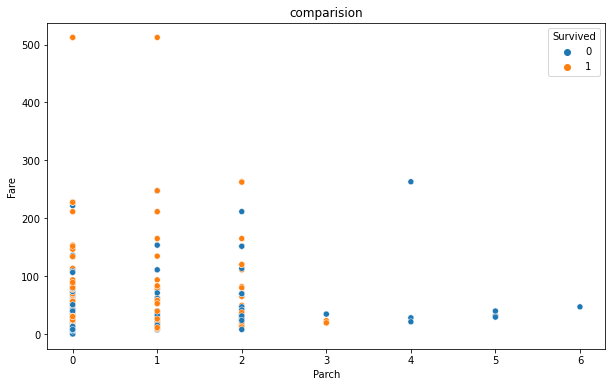

In [71]:
plt.figure(figsize=[10,6])
plt.title('comparision')
sns.scatterplot(df['Parch'],df['Fare'],hue=df["Survived"]);

Multi-variate Analysis

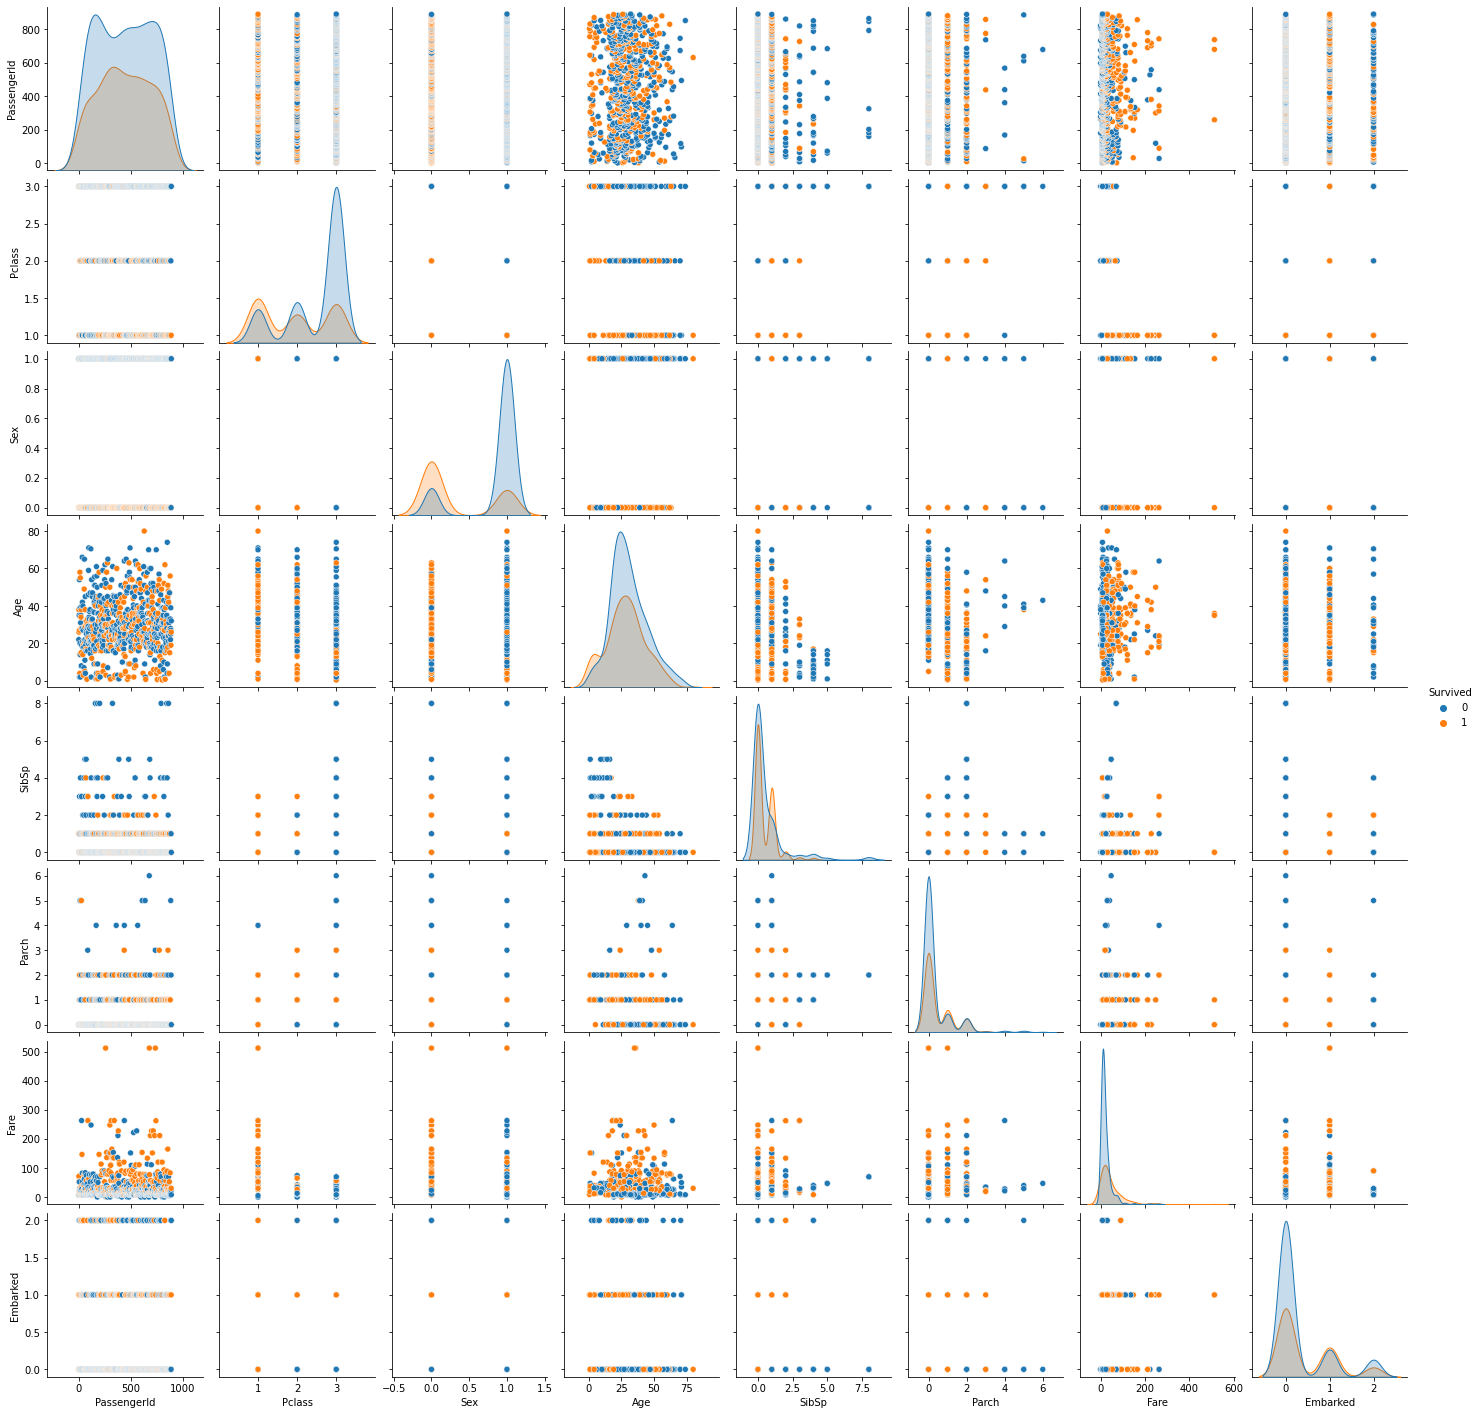

In [72]:
sns.pairplot(df,hue="Survived")

In [156]:
cor=df.corr()

In [157]:
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.118593
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,-0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


<AxesSubplot:>

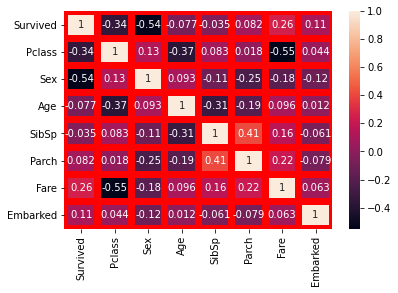

In [125]:
sns.heatmap(cor,annot=True,linewidth=6,linecolor='r')

In [227]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

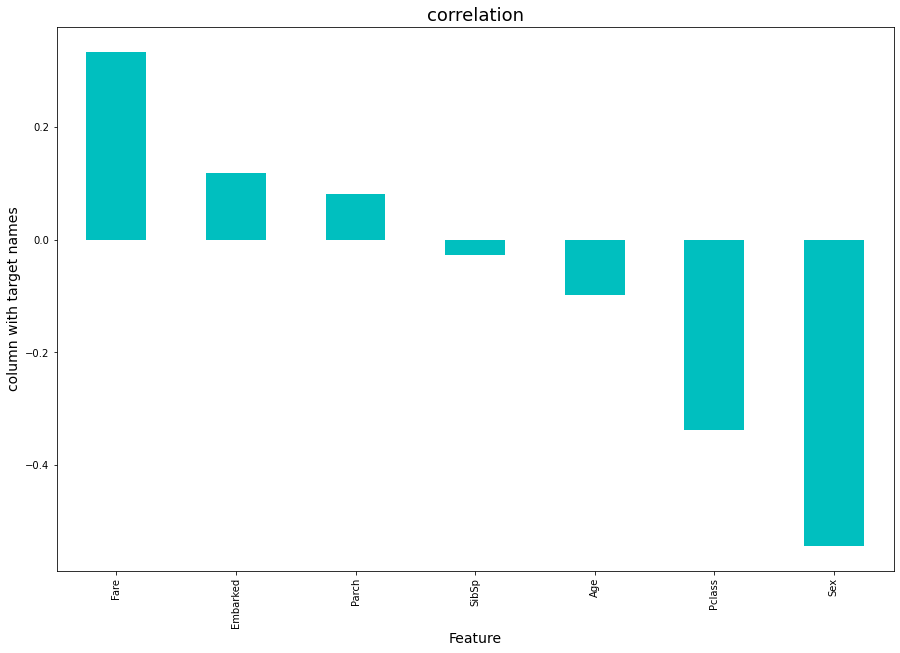

In [105]:
plt.figure(figsize=(15,10))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [158]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [159]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].median())

In [160]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [161]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [162]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x, y = SM.fit_resample(x,y)

In [131]:
y.value_counts()

1    549
0    549
Name: Survived, dtype: int64

In [133]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [134]:
new_df.shape

(820, 8)

In [135]:
df.shape

(891, 8)

In [138]:
Data_loss=((891-820)/891)*100

In [139]:
Data_loss

7.968574635241302

In [140]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [141]:
df_new.shape

(577, 8)

In [145]:
x=new_df.drop("Survived",axis=1)
y=new_df["Survived"]

In [165]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [166]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
dfpt=pt.fit_transform(df)
df=pd.DataFrame(dfpt,columns=df.columns)

In [167]:
df.skew()

Survived    0.478523
Pclass     -0.441438
Sex        -0.618921
Age         0.064420
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked    1.013716
dtype: float64